In [1]:
import pandas as pd
data = pd.read_excel("car_evaluation.xlsx",header = None)

In [2]:
columns=['buying','maint','doors','persons','lug_boot','safety','target']
column_map={'buying':'Buying Price','maint':'maintenance cost','doors':'Number of doors','persons':'seating capacity','lug_boot':'luggage capacity','safety':'safety','target':'class'}
data.columns=columns
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
for column in columns:
    data[column] = data[column].astype('category').cat.codes

In [4]:
from sklearn.model_selection import train_test_split

# Assuming 'target' is the column you're trying to predict
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
from sklearn.metrics import classification_report

# Assuming y_true contains the true labels and y_pred contains the predicted labels
y_true = y_test  # Replace with your actual true labels
y_pred = rf_model.predict(X_test)  # Replace with your actual predictions

# Generate the classification report
report = classification_report(y_true, y_pred)

# Print the report
print(report)


Accuracy: 0.9710982658959537
              precision    recall  f1-score   support

           0       0.99      0.89      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      0.99       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.97       346



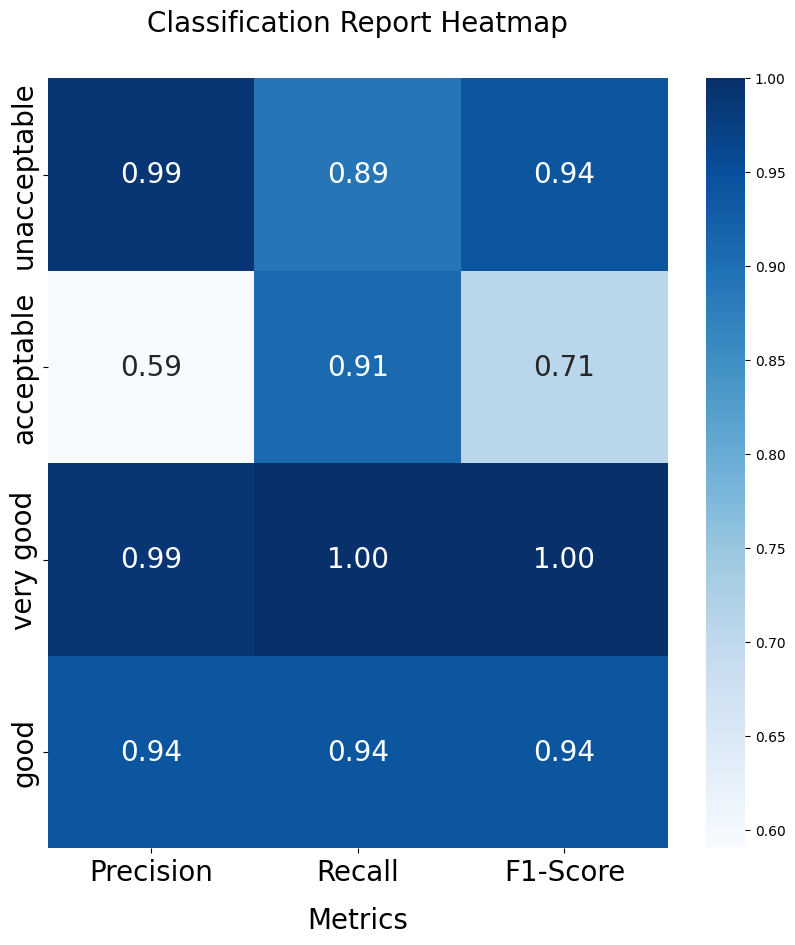

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each class
class_names = ['unacceptable', 'acceptable', 'very good', 'good']
metrics = np.array([[0.99, 0.89, 0.94],
                    [0.59, 0.91, 0.71],
                    [0.99, 1.00, 1.00],
                    [0.94, 0.94, 0.94]])

# Create a DataFrame
df = pd.DataFrame(metrics, columns=['Precision', 'Recall', 'F1-Score'], index=class_names)

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues', cbar=True,annot_kws={"size": 20})
plt.xlabel('Metrics',fontsize=20,labelpad =15)
plt.title('Classification Report Heatmap',fontsize=20,y=1.05)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()